In [1]:
# autoreload libaries
%load_ext autoreload
%autoreload 2

In [2]:
import data_load
import pandas as pd
import glob
import matplotlib.pyplot as plt 
import numpy as np
from datetime import datetime, timedelta


In [20]:
cdc_frames = data_load.get_cdc_dataframe2 ()
jhu_frames = data_load.get_jhu_dataframe ()
jhu_weekly_df =  data_load.get_jhu_dataframe_weekly ()

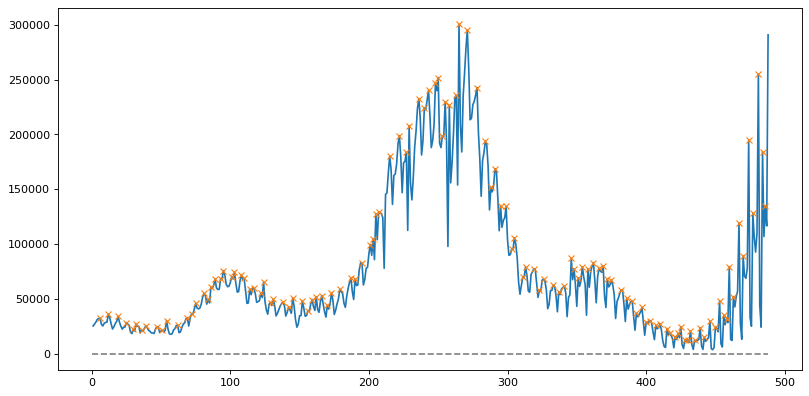

In [9]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.figure(figsize=(12, 6), dpi=80)

x = jhu_frames.NewCases.to_numpy().squeeze()

peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()


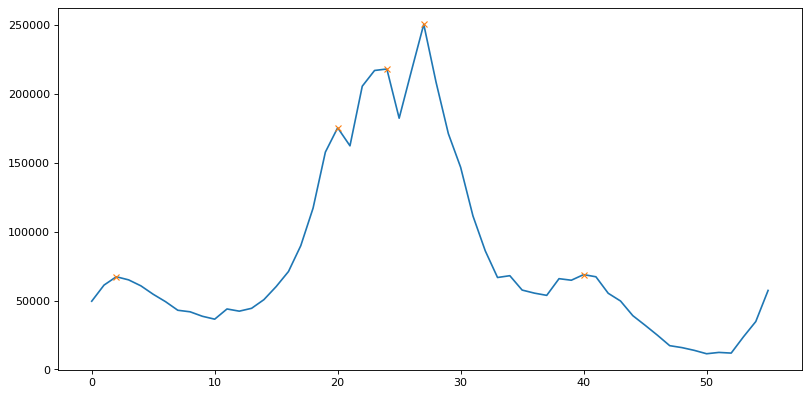

In [10]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
plt.figure(figsize=(12, 6), dpi=80)

jhu_y = jhu_weekly_df.to_numpy().squeeze()
jhu_x = jhu_weekly_df.index
jhu_peaks, _ = find_peaks(jhu_y,  prominence=10000)
plt.plot(jhu_y)
plt.plot(jhu_peaks, jhu_y[jhu_peaks], "x")
plt.show()

<AxesSubplot:xlabel='target_end_date'>

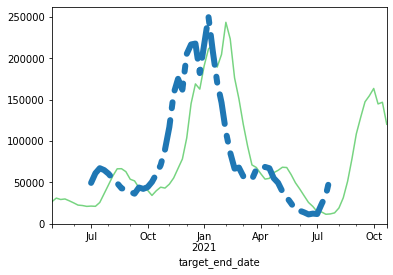

In [13]:
models = cdc_frames.Model.unique()
fig, ax = plt.subplots()

for model in models:
    #if model != "DDS-NBDS":
    if model != "COVIDhub-baseline":
        continue
    model_frame = data_load.get_model_by_date_range(model, cdc_frames, horizon=4)
    model_frame["point"].plot(ax=ax, color='#77d481', legend=False, label='_nolegend_')

jhu_weekly_df["WeeklyCases"].plot( ax=ax, linewidth=6, linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round', label="JHU - Actual Confirmed")


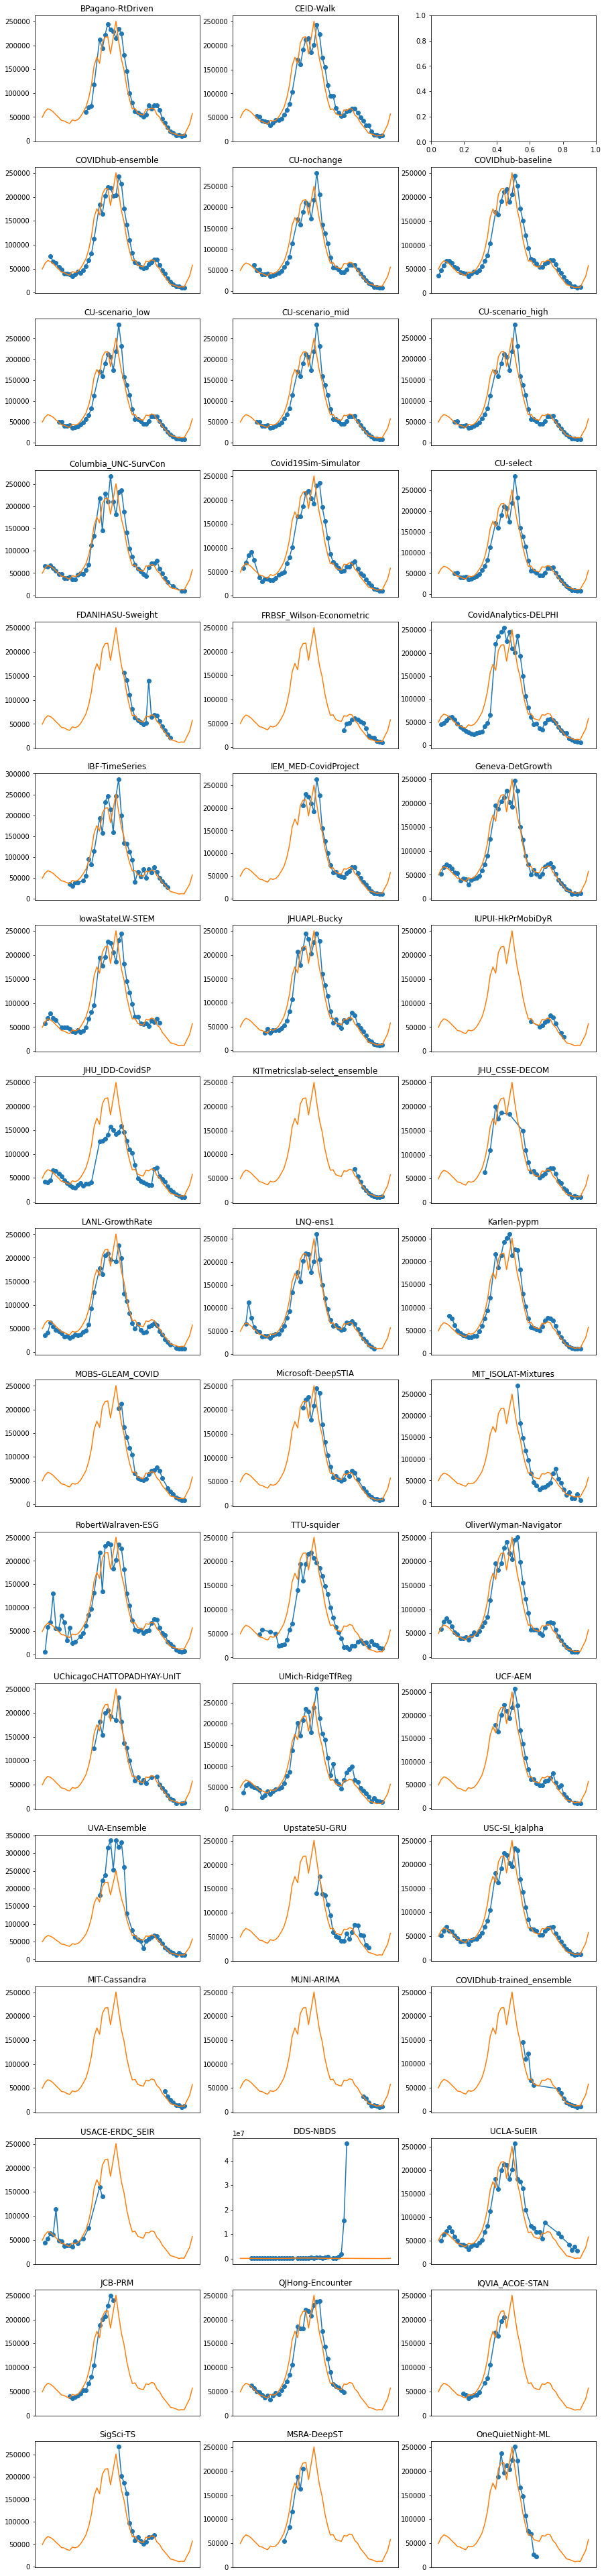

In [19]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fig, axes = plt.subplots(len(cdc_frames.Model.unique())//3, 3, figsize=(15,70))

for idx, model in enumerate(cdc_frames.Model.unique()):
    model_frame = data_load.get_model_by_date_range(model, cdc_frames, horizon=1)
    peak_dates = model_frame.index & jhu_x[jhu_peaks]

    model_y = model_frame.point.to_numpy().squeeze()
    model_x = model_frame.index
    
    if len(model_x) >2:
        model_peaks, _ = find_peaks(model_y,  prominence=10000)

        row = round(idx/3)
        axes[row, idx%3].plot(model_x, model_y)
        axes[row, idx%3].scatter(model_x, model_y)

        axes[row, idx%3].plot(jhu_x, jhu_y)

        
        axes[row, idx%3].title.set_text(model)
        axes[row, idx%3].set_xticks([])

        
fig.savefig('plots/all_models.png')

IndexError: index 18 is out of bounds for axis 0 with size 18

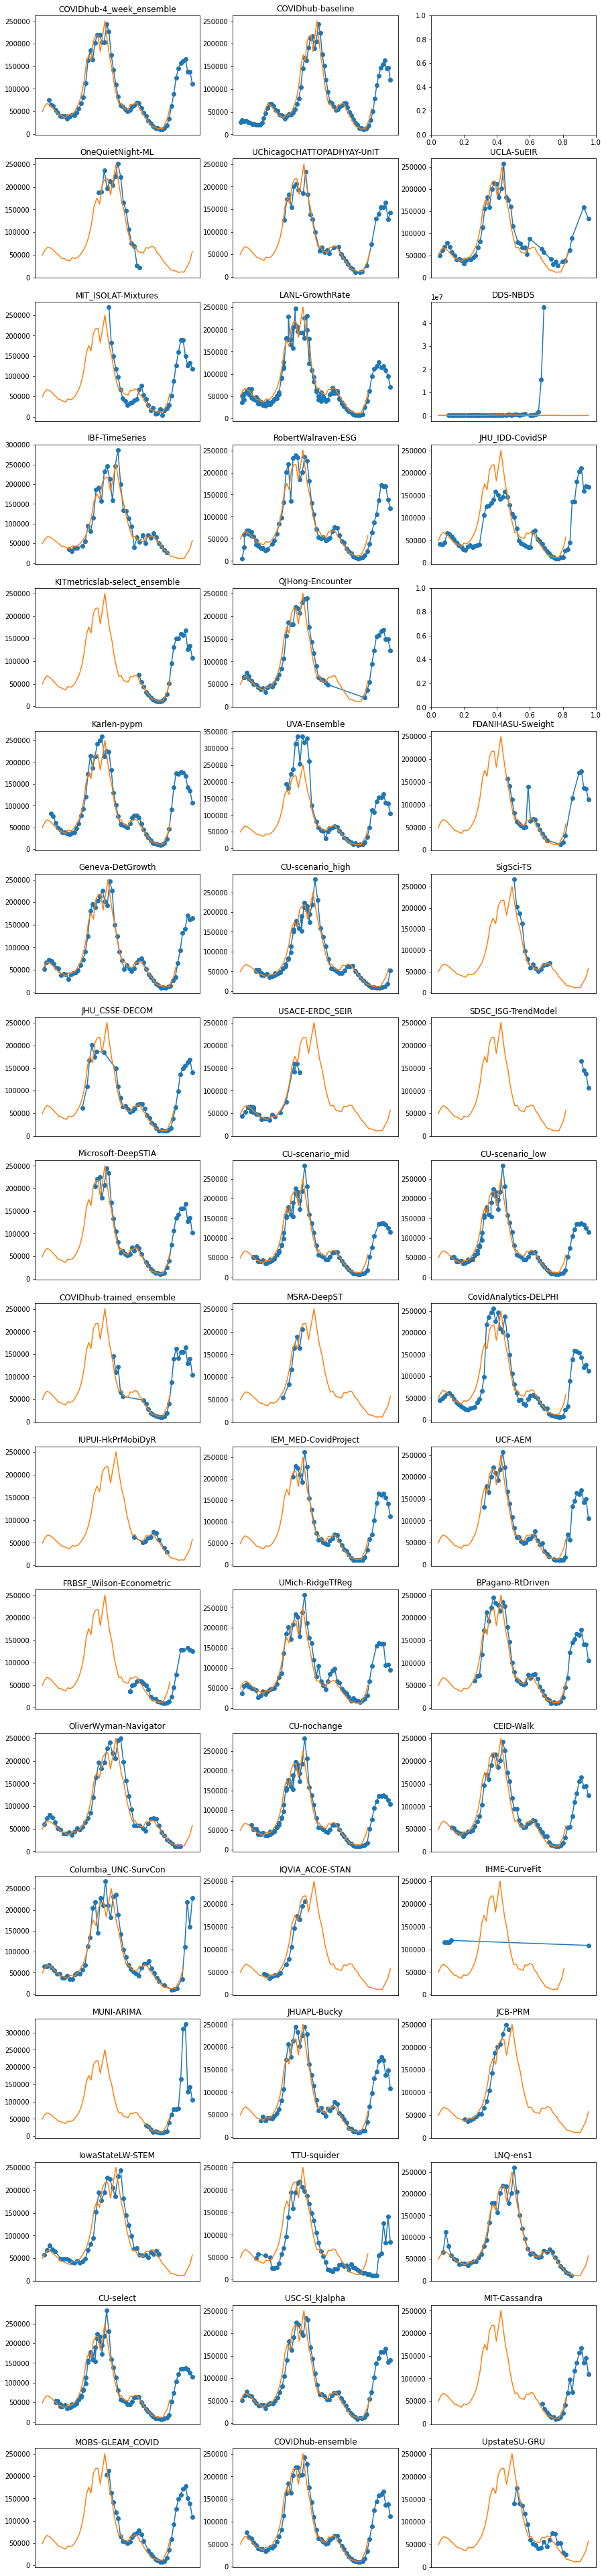

In [17]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

fig, axes = plt.subplots(len(cdc_frames.Model.unique())//3, 3, figsize=(15,70))

for idx, model in enumerate(cdc_frames.Model.unique()):
    model_frame = data_load.get_model_by_date_range(model, cdc_frames, horizon=1)
    peak_dates = model_frame.index & jhu_x[jhu_peaks]

    model_y = model_frame.point.to_numpy().squeeze()
    model_x = model_frame.index
    
    if len(model_x) >2:
        model_peaks, _ = find_peaks(model_y,  prominence=10000)

        row = round(idx/3)
        axes[row, idx%3].plot(model_x, model_y)
        axes[row, idx%3].scatter(model_x, model_y)

        axes[row, idx%3].plot(jhu_x, jhu_y)

        
        axes[row, idx%3].title.set_text(model)
        axes[row, idx%3].set_xticks([])

        
fig.savefig('plots/all_models.png')

In [100]:
for model in cdc_frames.Model.unique():
    model_frame = cdc_frames[(cdc_frames["Model"]==model) & (cdc_frames["target"] == "4 wk ahead inc case")][["target_end_date", "point"]]
    model_frame = model_frame.set_index("target_end_date", drop=True)
    model_frame = model_frame.sort_index()
    
    peak_dates = 
    
    target_dates = model_target_df.index.unique()
    jnu_target_df = jhu_weekly_df.loc[list(target_dates)]
    jnu_target_df.diff = 100*abs(model_target_df.point - jnu_target_df.WeeklyCases)/jnu_target_df.WeeklyCases
    
    stats[model]={}
    stats[model]["mae"]= round(jnu_target_df.diff.mean(),2)
    stats[model]["pred_count"]= len(jnu_target_df)

SyntaxError: invalid syntax (<ipython-input-100-35e4a1d3c3ca>, line 6)